# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

## 1. Business Understanding

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

### Analysis points
・Understand the characteristics of customers who have completed the offer.<br>
・Grouping customers.<br>
・Understand the similarities between customers so that you can search for recommended offers.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## 2. Data Understanding

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.<br>
<br>
Access<br>
Reading the csv and viewing few rows to have a look at the dataframe.<br>
We have imported numpy ,pandas for basic data analysis. Matplotlib and seaborn for data visualization.<br>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# sklearn libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Avoid overlapping areas
from pylab import rcParams
rcParams['figure.figsize'] = 10,10 
plt.tight_layout()
pd.set_option('display.max_columns', 100)

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#### Loading csv files and working on them.

In [2]:
# Check the contents of the dataset.
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
#Provide the number of rows in the dataset
portfolio_rows = portfolio.shape[0] 

#Provide the number of columns in the dataset
portfolio_cols = portfolio.shape[1] 

print(portfolio_rows)
print(portfolio_cols)

10
6


In [4]:
# Check the information of the dataset.
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [5]:
#Provide a set of columns with 0 missing values.
no_nulls = set(portfolio.columns[portfolio.isnull().mean()==0])
print(no_nulls)

{'duration', 'offer_type', 'reward', 'channels', 'id', 'difficulty'}


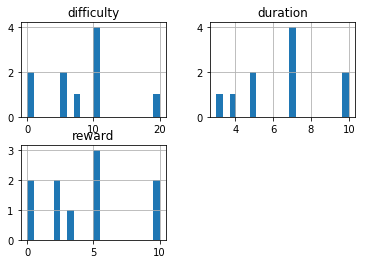

In [6]:
# Check the histgram data of columns(int type).
portfolio.hist(bins=20);

#### ・Observing the portfolio data
From this data, you can understand the content of each offer.


In [7]:
# Check the contents of the dataset.
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [8]:
#Provide the number of rows in the dataset
profile_rows = profile.shape[0] 

#Provide the number of columns in the dataset
profile_cols = profile.shape[1] 

print(profile_rows)
print(profile_cols)

17000
5


In [9]:
# Check the information of the dataset.
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [10]:
#Provide a set of columns with 0 missing values.
no_nulls = set(profile.columns[profile.isnull().mean()==0])
print(no_nulls)

{'became_member_on', 'id', 'age'}


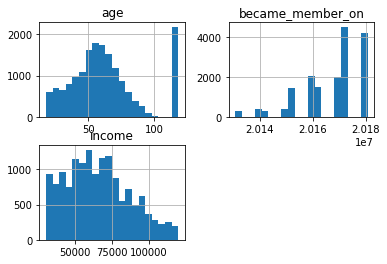

In [11]:
# Check the histgram data of columns(int type).
profile.hist(bins=20);

#### ・Observing the profile data<br>
The data in the price of the deta set may help in the analysis, but I'm not sure yet.<br>
・In the age histgram, there are weird data. The data is age:118, gender:None and income:NaN.<br>
The data will not effect good for analyzing. it must be deleted. 

In [12]:
# Check the contents of the dataset.
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [13]:
#Provide the number of rows in the dataset
transcript_rows = transcript.shape[0] 

#Provide the number of columns in the dataset
transcript_cols = transcript.shape[1] 

print(transcript_rows)
print(transcript_cols)

306534
4


In [14]:
# Check the information of the dataset.
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [15]:
#Provide a set of columns with 0 missing values.
no_nulls = set(transcript.columns[transcript.isnull().mean()==0])
print(no_nulls)

{'event', 'value', 'time', 'person'}


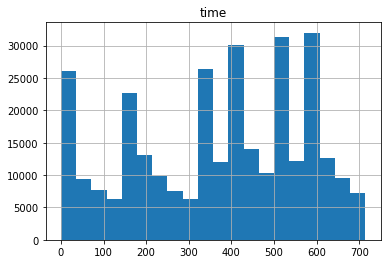

In [16]:
# Check the histgram data of columns(int type).
transcript.hist(bins=20);

・Observing the transcript data<br>
In this analysis, I will focus on the results of completing the offer.

## 3. Preparation data
・portfolio = portfolio.json : This data is very important, and you can analyze the purchasing tendency of customers by connecting the customer id and offer id and organizing the data.<br>
・profile = profile.json: As I mension above, there are some data which are deleted for analyzing. <br>
・transcript = transcript.json: In this data, the customer id and offer id in the person column and value column show the customer's purchasing behavior. <br>

In [17]:
# In the age histgram, there are weird data. The data is age:118, gender:None and income:NaN.
# The data will not effect good for analyzing. it must be deleted.
# Delete the particuller data for the profile.
profile_del = profile.index[profile["age"] ==118]
profile_del
profile = profile.drop(profile_del)

In [18]:
# Check the information of the dataset.
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
id                  14825 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [19]:
# Sort in ascending order of ID in the profile data.
profile = profile.sort_values('id')
profile.head()

,age,became_member_on,gender,id,income
3793,33,20170421,M,0009655768c64bdeb2e877511632db8f,72000.0
4201,40,20180109,O,0011e0d4e6b944f998e987f904e8c1e5,57000.0
2563,59,20160304,F,0020c2b971eb4e9188eac86d93036a77,90000.0
8413,24,20161111,F,0020ccbbb6d84e358d3414a3ff76cffd,60000.0
10128,26,20170621,F,003d66b6608740288d6cc97a6903f4f0,73000.0


In [20]:
# Rename the column name of the person to id and sort in ascending order of ID in the transcript data.
transcript = transcript.rename(columns={'person': 'id'})
transcript = transcript.sort_values('id')
transcript.head()

,event,id,time,value
302205,transaction,0009655768c64bdeb2e877511632db8f,696,{'amount': 18.41}
168412,transaction,0009655768c64bdeb2e877511632db8f,414,{'amount': 8.57}
300930,transaction,0009655768c64bdeb2e877511632db8f,690,{'amount': 28.16}
55972,offer received,0009655768c64bdeb2e877511632db8f,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
153401,offer received,0009655768c64bdeb2e877511632db8f,408,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}


In [21]:
# Sort in ascending order of offer_type in the portfolio data.
portfolio = portfolio.sort_values('offer_type')
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [22]:
# Merge transcript and profile data using id as a key.
transcript = pd.merge(transcript, profile, on="id", how="inner")
transcript.head()

,event,id,time,value,age,became_member_on,gender,income
0,transaction,0009655768c64bdeb2e877511632db8f,696,{'amount': 18.41},33,20170421,M,72000.0
1,transaction,0009655768c64bdeb2e877511632db8f,414,{'amount': 8.57},33,20170421,M,72000.0
2,transaction,0009655768c64bdeb2e877511632db8f,690,{'amount': 28.16},33,20170421,M,72000.0
3,offer received,0009655768c64bdeb2e877511632db8f,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},33,20170421,M,72000.0
4,offer received,0009655768c64bdeb2e877511632db8f,408,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},33,20170421,M,72000.0


In [23]:
# In the event column, extract the data of offer completed.
transcript = transcript[transcript['event'].str.contains('offer completed')]
transcript.head()

,event,id,time,value,age,became_member_on,gender,income
7,offer completed,0009655768c64bdeb2e877511632db8f,528,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,33,20170421,M,72000.0
10,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,33,20170421,M,72000.0
13,offer completed,0009655768c64bdeb2e877511632db8f,576,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,33,20170421,M,72000.0
20,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,40,20180109,O,57000.0
21,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,40,20180109,O,57000.0


In [24]:
# Check the information of the dataset.
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32444 entries, 7 to 272759
Data columns (total 8 columns):
event               32444 non-null object
id                  32444 non-null object
time                32444 non-null int64
value               32444 non-null object
age                 32444 non-null int64
became_member_on    32444 non-null int64
gender              32444 non-null object
income              32444 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


In [25]:
# Convert the data type of the value column to string.
transcript['value'] = transcript['value'].astype(str)

In [26]:
# Check the number of digits of offer_id.
portfolio_len = portfolio['id'].str.len() 
portfolio_len

0    32
1    32
3    32
8    32
4    32
5    32
6    32
9    32
2    32
7    32
Name: id, dtype: int64

In [27]:
# Extract only the offer_id of the value column and add a new offer_id column.
transcript['offer_id'] = transcript['value'].map(lambda x: str(x)[14:46])
transcript.head()

,event,id,time,value,age,became_member_on,gender,income,offer_id
7,offer completed,0009655768c64bdeb2e877511632db8f,528,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,33,20170421,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4
10,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,33,20170421,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d
13,offer completed,0009655768c64bdeb2e877511632db8f,576,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,33,20170421,M,72000.0,2906b810c7d4411798c6938adc9daaa5
20,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,40,20180109,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2
21,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,40,20180109,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [28]:
# To make it easier to read, convert offer_id as follows.
transcript_map = {
    'ae264e3637204a6fb9bb56bc8210ddfd':'offer_01',
    '4d5c57ea9a6940dd891ad53e9dbe8da0':'offer_02',
    '3f207df678b143eea3cee63160fa8bed':'offer_03',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9':'offer_04',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7':'offer_05',
    '2298d6c36e964ae4a3e7e9706d1fb8c2':'offer_06',
    'fafdcd668e3743c1bb461111dcafc2a4':'offer_07',
    '5a8bc65990b245e5a138643cd4eb9837':'offer_08',
    'f19421c1d4aa40978ebb69ca19b0e20d':'offer_09',
    '2906b810c7d4411798c6938adc9daaa5':'offer_10'
}
transcript_map

{'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_01',
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_02',
 '3f207df678b143eea3cee63160fa8bed': 'offer_03',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_04',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_05',
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_06',
 'fafdcd668e3743c1bb461111dcafc2a4': 'offer_07',
 '5a8bc65990b245e5a138643cd4eb9837': 'offer_08',
 'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_09',
 '2906b810c7d4411798c6938adc9daaa5': 'offer_10'}

In [29]:
# Add a new column with the offer_id read above as offer_no. 
transcript['offer_no'] = transcript['offer_id'].map(transcript_map)
transcript.head()

,event,id,time,value,age,became_member_on,gender,income,offer_id,offer_no
7,offer completed,0009655768c64bdeb2e877511632db8f,528,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,33,20170421,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07
10,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,33,20170421,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09
13,offer completed,0009655768c64bdeb2e877511632db8f,576,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,33,20170421,M,72000.0,2906b810c7d4411798c6938adc9daaa5,offer_10
20,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,40,20180109,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_06
21,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,40,20180109,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_05


In [30]:
# Convert id in the portfolio dataset as follows.
portfolio_map = {
    'ae264e3637204a6fb9bb56bc8210ddfd':'offer_01',
    '4d5c57ea9a6940dd891ad53e9dbe8da0':'offer_02',
    '3f207df678b143eea3cee63160fa8bed':'offer_03',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9':'offer_04',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7':'offer_05',
    '2298d6c36e964ae4a3e7e9706d1fb8c2':'offer_06',
    'fafdcd668e3743c1bb461111dcafc2a4':'offer_07',
    '5a8bc65990b245e5a138643cd4eb9837':'offer_08',
    'f19421c1d4aa40978ebb69ca19b0e20d':'offer_09',
    '2906b810c7d4411798c6938adc9daaa5':'offer_10'
}
portfolio_map

{'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_01',
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_02',
 '3f207df678b143eea3cee63160fa8bed': 'offer_03',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_04',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_05',
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_06',
 'fafdcd668e3743c1bb461111dcafc2a4': 'offer_07',
 '5a8bc65990b245e5a138643cd4eb9837': 'offer_08',
 'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_09',
 '2906b810c7d4411798c6938adc9daaa5': 'offer_10'}

In [31]:
# Add a new column with the id read above as offer_no. 
portfolio['offer_no'] = portfolio['id'].map(portfolio_map)
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward,offer_no
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,offer_01
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,offer_02
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,offer_04
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,offer_09
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,offer_05
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,offer_06
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,offer_07
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,offer_10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,offer_03
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,offer_08


In [32]:
# Merge transcript and portfolio data using offer_no as a key.
transcript_2 = pd.merge(transcript, portfolio, on="offer_no", how="inner")
transcript_2 = transcript_2.sort_values('id_x')
transcript_2.head()

,event,id_x,time,value,age,became_member_on,gender,income,offer_id,offer_no,channels,difficulty,duration,id_y,offer_type,reward
0,offer completed,0009655768c64bdeb2e877511632db8f,528,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,33,20170421,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
9106,offer completed,0009655768c64bdeb2e877511632db8f,576,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,33,20170421,M,72000.0,2906b810c7d4411798c6938adc9daaa5,offer_10,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
5003,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,33,20170421,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
13017,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,40,20180109,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_06,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
17903,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,40,20180109,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_05,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [33]:
# Drop the value column and id_y column.
transcript_2 = transcript_2.drop(['value', 'id_y'], axis = 1)
transcript_2.head(5)

,event,id_x,time,age,became_member_on,gender,income,offer_id,offer_no,channels,difficulty,duration,offer_type,reward
0,offer completed,0009655768c64bdeb2e877511632db8f,528,33,20170421,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,discount,2
9106,offer completed,0009655768c64bdeb2e877511632db8f,576,33,20170421,M,72000.0,2906b810c7d4411798c6938adc9daaa5,offer_10,"[web, email, mobile]",10,7,discount,2
5003,offer completed,0009655768c64bdeb2e877511632db8f,414,33,20170421,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09,"[web, email, mobile, social]",5,5,bogo,5
13017,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,40,20180109,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_06,"[web, email, mobile, social]",7,7,discount,3
17903,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,40,20180109,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_05,"[web, email]",20,10,discount,5


In [34]:
# Change the column name of the id_x column to customer_id.
# Ascending the order of customer_id.
transcript_fin = transcript_2.rename(columns={'id_x': 'customer_id'})
transcript_fin = transcript_fin.sort_values('customer_id')
transcript_fin.head(10)

,event,customer_id,time,age,became_member_on,gender,income,offer_id,offer_no,channels,difficulty,duration,offer_type,reward
0,offer completed,0009655768c64bdeb2e877511632db8f,528,33,20170421,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,discount,2
9106,offer completed,0009655768c64bdeb2e877511632db8f,576,33,20170421,M,72000.0,2906b810c7d4411798c6938adc9daaa5,offer_10,"[web, email, mobile]",10,7,discount,2
5003,offer completed,0009655768c64bdeb2e877511632db8f,414,33,20170421,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09,"[web, email, mobile, social]",5,5,bogo,5
13017,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,40,20180109,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_06,"[web, email, mobile, social]",7,7,discount,3
17903,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,40,20180109,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_05,"[web, email]",20,10,discount,5
21289,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,40,20180109,O,57000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_04,"[web, email, mobile]",5,7,bogo,5
2,offer completed,0020c2b971eb4e9188eac86d93036a77,510,59,20160304,F,90000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,discount,2
1,offer completed,0020c2b971eb4e9188eac86d93036a77,54,59,20160304,F,90000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,discount,2
25477,offer completed,0020c2b971eb4e9188eac86d93036a77,510,59,20160304,F,90000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_02,"[web, email, mobile, social]",10,5,bogo,10
5004,offer completed,0020ccbbb6d84e358d3414a3ff76cffd,378,24,20161111,F,60000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09,"[web, email, mobile, social]",5,5,bogo,5


In [35]:
# Converts data in the became_member_on column to datetime type
transcript_fin["became_member_on"] = pd.to_datetime(transcript_fin['became_member_on'], format='%Y%m%d')
print(transcript_fin.describe())
transcript_fin.head()

               time           age         income   difficulty      duration  \
count  32444.000000  32444.000000   32444.000000  32444.00000  32444.000000   
mean     399.615645     55.826624   69430.803847      9.31411      7.318734   
std      192.577529     16.809418   21604.250324      4.20840      1.771882   
min        0.000000     18.000000   30000.000000      5.00000      5.000000   
25%      234.000000     45.000000   53000.000000      5.00000      7.000000   
50%      432.000000     57.000000   69000.000000     10.00000      7.000000   
75%      558.000000     67.000000   85000.000000     10.00000     10.000000   
max      714.000000    101.000000  120000.000000     20.00000     10.000000   

             reward  
count  32444.000000  
mean       4.948249  
std        2.905376  
min        2.000000  
25%        2.000000  
50%        5.000000  
75%        5.000000  
max       10.000000  


,event,customer_id,time,age,became_member_on,gender,income,offer_id,offer_no,channels,difficulty,duration,offer_type,reward
0,offer completed,0009655768c64bdeb2e877511632db8f,528,33,2017-04-21,M,72000.0,fafdcd668e3743c1bb461111dcafc2a4,offer_07,"[web, email, mobile, social]",10,10,discount,2
9106,offer completed,0009655768c64bdeb2e877511632db8f,576,33,2017-04-21,M,72000.0,2906b810c7d4411798c6938adc9daaa5,offer_10,"[web, email, mobile]",10,7,discount,2
5003,offer completed,0009655768c64bdeb2e877511632db8f,414,33,2017-04-21,M,72000.0,f19421c1d4aa40978ebb69ca19b0e20d,offer_09,"[web, email, mobile, social]",5,5,bogo,5
13017,offer completed,0011e0d4e6b944f998e987f904e8c1e5,252,40,2018-01-09,O,57000.0,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_06,"[web, email, mobile, social]",7,7,discount,3
17903,offer completed,0011e0d4e6b944f998e987f904e8c1e5,576,40,2018-01-09,O,57000.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_05,"[web, email]",20,10,discount,5


### 4. Modeling
Analyse
##### 4-1. Extract only "offer compleated" data and understand the features from that data.

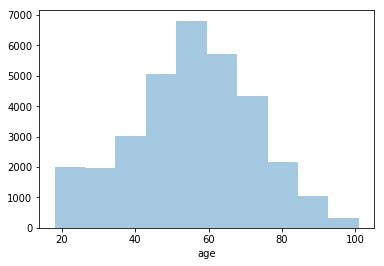

In [36]:
# visualization of number of age.
sns.distplot(transcript_fin["age"], kde=False, bins=10)

・According to the graph above,many users in their 50s to 70s.

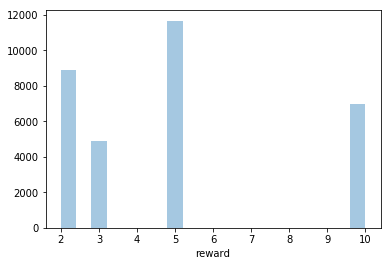

In [37]:
# visualization of number of reward.
sns.distplot(transcript_fin["reward"], kde=False, bins=20)

・According to the graph above, There are many users of 2 and 5 in reward.

In [38]:
# Results of basic statistics.
transcript_fin.describe()

,time,age,income,difficulty,duration,reward
count,32444.000000,32444.000000,32444.000000,32444.00000,32444.000000,32444.000000
mean,399.615645,55.826624,69430.803847,9.31411,7.318734,4.948249
std,192.577529,16.809418,21604.250324,4.20840,1.771882,2.905376
min,0.000000,18.000000,30000.000000,5.00000,5.000000,2.000000
25%,234.000000,45.000000,53000.000000,5.00000,7.000000,2.000000
50%,432.000000,57.000000,69000.000000,10.00000,7.000000,5.000000
75%,558.000000,67.000000,85000.000000,10.00000,10.000000,5.000000
max,714.000000,101.000000,120000.000000,20.00000,10.000000,10.000000


・According to the graph above, the average age is 55, and the average reward used is about 5.

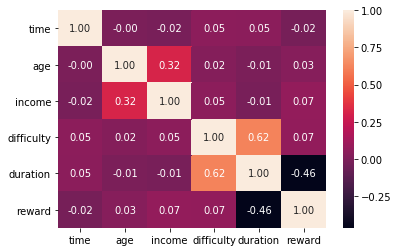

In [39]:
# make a heat map of these data.
sns.heatmap(transcript_fin.corr(), annot=True, fmt=".2f");

・According to the graph above, there is a correlation between age and income, and between duration and difficulty.

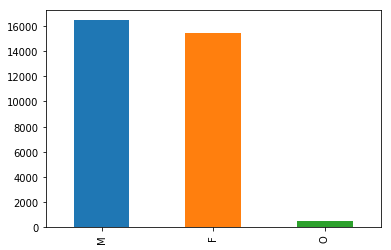

In [40]:
# visualization of number of gender.
transcript_fin['gender'].value_counts().plot(kind="bar")
plt.show()

・According to the graph above, there are a little more male users than female users.

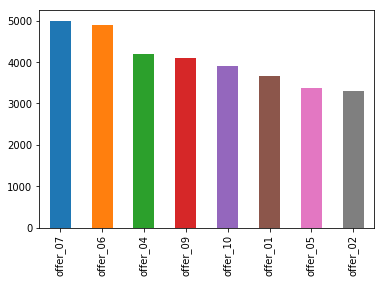

In [41]:
# visualization of number of offer_no.
transcript_fin['offer_no'].value_counts().plot(kind="bar")
plt.show()

・According to the graph above, the relatively used offer_no are 7, 6, 4, and 9.

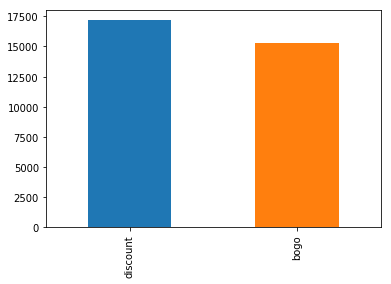

In [42]:
# visualization of number of offer_type.
transcript_fin['offer_type'].value_counts().plot(kind="bar")
plt.show()

・According to the graph above, in offer_type, discount is used rather than bogo.

##### 4-2. Perform cluster analysis from the data in transcript_fin to understand the characteristics of offer completed users. 

In [43]:
# Use the age column, income column, and customer_id column from transcript_fin.
# Count customer_id.
# Change the column name of customer_id to offer_count.
use_offer_cluster = transcript_fin[["income", 'customer_id',"age"]]
use_offer_cluster = use_offer_cluster.groupby(["income", "age"],as_index=False).count()
use_offer_cluster.rename(columns={"customer_id":"offer_count"}, inplace=True)
use_offer_cluster.head()

,income,age,offer_count
0,30000.0,19,6
1,30000.0,20,8
2,30000.0,22,1
3,30000.0,25,4
4,30000.0,26,1


In [44]:
# Divide the above data into 4 clusters.
sc = StandardScaler()
use_offer_sc = sc.fit_transform(use_offer_cluster)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(use_offer_sc)
use_offer_cluster["cluster"] = clusters.labels_
print(use_offer_cluster ["cluster"].unique())
use_offer_cluster.head()

[3 0 2 1]


,income,age,offer_count,cluster
0,30000.0,19,6,3
1,30000.0,20,8,3
2,30000.0,22,1,3
3,30000.0,25,4,3
4,30000.0,26,1,3


In [45]:
# Change the order of columns.
use_offer_cluster = use_offer_cluster.reindex(columns=['cluster', 'offer_count', 'income', 'age'])
use_offer_cluster.head()

,cluster,offer_count,income,age
0,3,6,30000.0,19
1,3,8,30000.0,20
2,3,1,30000.0,22
3,3,4,30000.0,25
4,3,1,30000.0,26


In [46]:
# Count the above data.
use_offer_cluster.groupby("cluster").count()

,offer_count,income,age
cluster,,,
0,1097,1097,1097
1,1289,1289,1289
2,791,791,791
3,1366,1366,1366


In [47]:
# Calculate the average value.
use_offer_mean =use_offer_cluster.groupby("cluster").mean()
use_offer_mean

,offer_count,income,age
cluster,,,
0,4.677302,52889.699180,74.499544
1,5.398759,98192.397207,66.345229
2,15.925411,70762.326169,56.554994
3,5.678624,52561.493411,35.237921


[Text(0,0,'cluster0'),
 Text(0,0,'cluster1'),
 Text(0,0,'cluster2'),
 Text(0,0,'cluster3')]

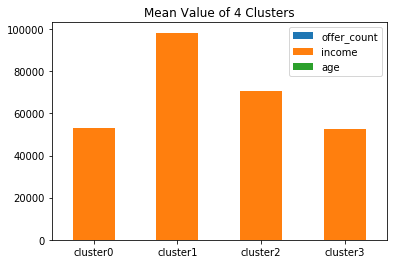

In [48]:
# Graph the mean data.
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = use_offer_cluster[use_offer_cluster['cluster'] == i].mean()
clusterinfo = clusterinfo.drop('cluster')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

・According to the cluster analysis above, dividing the data into four clusters and calculating the average value of the offer_count, income, and age items, the features of each cluster can be understood.

#### ・Principal component analysis is performed to delete the dimensions of the data.

In [49]:
# To perform PCA analysis, extract the target columns as shown below.
# Convert data to float type
use_offer_pca = transcript_fin[["income", 'customer_id',"age", "reward", "difficulty", "duration", "time"]]
use_offer_pca = use_offer_pca.groupby(["income", "age", "reward", "difficulty", "duration", "time"],as_index=False).count()
use_offer_pca.rename(columns={"customer_id":"offer_count"}, inplace=True)
use_offer_pca.head()
use_offer_pca_2 = use_offer_pca.astype('float')
use_offer_pca_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31874 entries, 0 to 31873
Data columns (total 7 columns):
income         31874 non-null float64
age            31874 non-null float64
reward         31874 non-null float64
difficulty     31874 non-null float64
duration       31874 non-null float64
time           31874 non-null float64
offer_count    31874 non-null float64
dtypes: float64(7)
memory usage: 1.9 MB


In [50]:
# Standardize the data.
sc = StandardScaler()
sc_df = sc.fit_transform(use_offer_pca_2)

In [51]:
# generating a model
model = PCA(whiten = True)
model.fit(sc_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [52]:
# Eigenvectors of each principal component
print(model.components_[0])
print('-----------------')
print(model.components_[1])
print('-----------------')
print(model.components_[2])
print('-----------------')
print(model.components_[3])
print('-----------------')
print(model.components_[4])
print('-----------------')
print(model.components_[5])
print('-----------------')
print(model.components_[6])

[-0.02301985 -0.01602119 -0.39916072  0.5595386   0.71762108  0.09794785
  0.04718993]
-----------------
[ 0.68359816  0.65757447  0.23681388  0.20837635  0.00764896 -0.02119003
  0.01674312]
-----------------
[-0.09219649 -0.16194658  0.47532032  0.28531926 -0.07885848  0.55367607
  0.58750385]
-----------------
[ 0.11960288  0.24585448 -0.5918421  -0.48641647 -0.02355277  0.40850221
  0.41345361]
-----------------
[ 0.01791117 -0.04943975 -0.0321941   0.00406594  0.03070052 -0.71728261
  0.6933578 ]
-----------------
[-0.71343253  0.69152936  0.08285522  0.05756704 -0.00184276 -0.04446593
  0.02533002]
-----------------
[-0.00719812 -0.00329927 -0.44775214  0.56758902 -0.69082716 -0.0073753
 -0.00120916]


In [53]:
# Fit existing data to the new 6 axes.
new = model.transform(sc_df)
new_df = pd.DataFrame(new)
new_df.head(3)

,0,1,2,3,4,5,6
0,1.130408,-2.455769,-0.991616,-0.992580,1.294055,-0.267811,-1.064921
1,1.266190,-2.489266,-0.011618,-0.253543,-0.065710,-0.366601,-1.095837
2,-0.151464,-2.536037,-0.586301,-0.572698,0.787938,-0.311215,0.319492


In [54]:
# Join the new 7 columns and the original column.
new_df.columns = {'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'}
use_offer_pca_3 = pd.DataFrame(sc_df, columns = use_offer_pca_2.columns)
use_offer_pca_4 = pd.concat([use_offer_pca_3, new_df], axis=1)

In [55]:
# Calculation of correlation coefficient
df_corr = use_offer_pca_4.corr()
df_corr.iloc[:6, 7:]

,PC6,PC2,PC4,PC1,PC7,PC3,PC5
income,-0.030441,0.792739,-0.095487,0.121191,0.017320,-0.588663,-0.003148
age,-0.021186,0.762560,-0.167727,0.249119,-0.047808,0.570590,-0.001443
reward,-0.527839,0.274623,0.492286,-0.599700,-0.031132,0.068365,-0.195809
difficulty,0.739918,0.241645,0.295503,-0.492874,0.003932,0.047499,0.248215
duration,0.948961,0.008870,-0.081673,-0.023865,0.029687,-0.001520,-0.302109
time,0.129523,-0.024573,0.573438,0.413926,-0.693612,-0.036689,-0.003225


In [56]:
# Calculation of contribution rate
model.explained_variance_ratio_

array([ 0.24980937,  0.19211453,  0.15323691,  0.14667563,  0.13358406,
        0.09725891,  0.0273206 ])

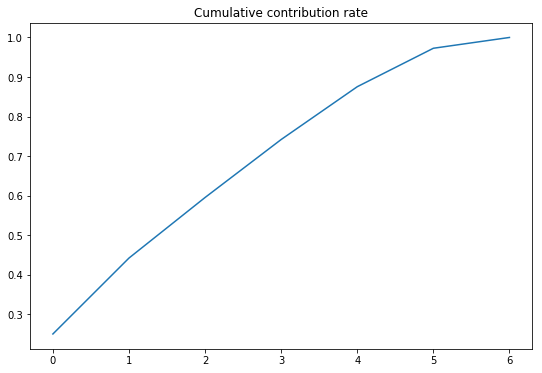

In [57]:
# Calculation of cumulative contribution rate
ratio = model.explained_variance_ratio_
array = []
for i in range(len(ratio)):
    data = sum(ratio[0:(i+1)])
    array.append(data)
pd.Series(array).plot(kind = 'line', title='Cumulative contribution rate', figsize=(9, 6))

In [58]:
# From the result of the cumulative contribution rate above, the analysis is performed by reducing the number of columns to four.
model = PCA(n_components = 4, whiten = True)
model.fit(sc_df)
new2 = model.transform(sc_df)

In [59]:
# Eigenvectors of each principal component
print(model.components_[0])
print('-----------------')
print(model.components_[1])
print('-----------------')
print(model.components_[2])
print('-----------------')
print(model.components_[3])

[-0.02301985 -0.01602119 -0.39916072  0.5595386   0.71762108  0.09794785
  0.04718993]
-----------------
[ 0.68359816  0.65757447  0.23681388  0.20837635  0.00764896 -0.02119003
  0.01674312]
-----------------
[-0.09219649 -0.16194658  0.47532032  0.28531926 -0.07885848  0.55367607
  0.58750385]
-----------------
[ 0.11960288  0.24585448 -0.5918421  -0.48641647 -0.02355277  0.40850221
  0.41345361]


In [60]:
# Fit existing data to the new 4 axes.
new_df2 = pd.DataFrame(new2)
new_df2.head(3)

,0,1,2,3
0,1.130408,-2.455769,-0.991616,-0.992580
1,1.266190,-2.489266,-0.011618,-0.253543
2,-0.151464,-2.536037,-0.586301,-0.572698


In [61]:
# Join the new 4 columns and the original column.
use_offer_pca_5 = pd.DataFrame(sc_df, columns = use_offer_pca_2.columns)
use_offer_pca_6 = pd.concat([use_offer_pca_5, new_df2], axis=1)
use_offer_pca_6.head(3)

,income,age,reward,difficulty,duration,time,offer_count,0,1,2,3
0,-1.823412,-2.190744,-1.014081,0.167217,1.516178,-1.657062,-0.13375,1.130408,-2.455769,-0.991616,-0.992580
1,-1.823412,-2.190744,-1.014081,0.167217,1.516178,0.176125,-0.13375,1.266190,-2.489266,-0.011618,-0.253543
2,-1.823412,-2.190744,-0.670060,-0.548267,-0.177335,-1.066714,-0.13375,-0.151464,-2.536037,-0.586301,-0.572698


In [62]:
# Calculation of correlation coefficient
df_corr = use_offer_pca_6.corr()
df_corr.iloc[:6, 7:]

,0,1,2,3
income,-0.030441,0.792739,-0.095487,0.121191
age,-0.021186,0.762560,-0.167727,0.249119
reward,-0.527839,0.274623,0.492286,-0.599700
difficulty,0.739918,0.241645,0.295503,-0.492874
duration,0.948961,0.008870,-0.081673,-0.023865
time,0.129523,-0.024573,0.573438,0.413926


・According to the PCA analysis above, It can be understood that the data of transcript_fin has the following correlations by principal<br> component analysis.<br>
0 : difficulty and duration(positive)<br>
1 : income and age(positive)<br>
2 : reward, difficulty and time(positive)<br>
3 : tiem and age(positive)<br>

#### 4-3. Finally, we will analyze the similarities between customers who used the offer and create a mechanism that can extract recommended offer no.

In [63]:
# create the user matrix with 1's and 0's
def create_user_item_matrix(transcript_fin):
    '''
    INPUT:
    transcript_fin - pandas dataframe with customer_id, title, offer_no
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with customer_id as rows and other information on the columns with 1 values where a user completed with 
    an offer and a 0 otherwise
    '''
    # Fill in the function here
    user_item = transcript_fin.groupby(by=['customer_id',"offer_no"]).agg(lambda x: 1).unstack().fillna(0)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(transcript_fin)

In [64]:
user_item.head()
# There are complications that occurred during coding, like below.
# There are same column data of each item. so I just used the event item data for this analysis.

event                                      \
offer_no                         offer_01 offer_02 offer_04 offer_05 offer_06   
customer_id                                                                     
0009655768c64bdeb2e877511632db8f      0.0      0.0      0.0      0.0      0.0   
0011e0d4e6b944f998e987f904e8c1e5      0.0      0.0      1.0      1.0      1.0   
0020c2b971eb4e9188eac86d93036a77      0.0      1.0      0.0      0.0      0.0   
0020ccbbb6d84e358d3414a3ff76cffd      0.0      0.0      1.0      0.0      1.0   
003d66b6608740288d6cc97a6903f4f0      0.0      0.0      0.0      1.0      0.0   

                                                                time           \
offer_no                         offer_07 offer_09 offer_10 offer_01 offer_02   
customer_id                                                                     
0009655768c64bdeb2e877511632db8f      1.0      1.0      1.0      0.0      0.0   
0011e0d4e6b944f998e987f904e8c1e5      0.0      0.0      0.0      0.0      0.0   
0020c2b971eb4e9188eac86d93036a77      1.0      0.0      0.0      0.0      1.0   
0020ccbbb6d84e358d3414a3ff76cffd      0.0      1.0      0.0      0.0      0.0   
003d66b6608740288d6cc97a6903f4f0      1.0      0.0      0.0      0.0      0.0   

                                                                               \
offer_no                         offer_04 offer_05 offer_06 offer_07 offer_09   
customer_id                                                                     
0009655768c64bdeb2e877511632db8f      0.0      0.0      0.0      1.0      1.0   
0011e0d4e6b944f998e987f904e8c1e5      1.0      1.0      1.0      0.0      0.0   
0020c2b971eb4e9188eac86d93036a77      0.0      0.0      0.0      1.0      0.0   
0020ccbbb6d84e358d3414a3ff76cffd      1.0      0.0      1.0      0.0      1.0   
003d66b6608740288d6cc97a6903f4f0      0.0      1.0      0.0      1.0      0.0   

                                               age                             \
offer_no                         offer_10 offer_01 offer_02 offer_04 offer_05   
customer_id                                                                     
0009655768c64bdeb2e877511632db8f      1.0      0.0      0.0      0.0      0.0   
0011e0d4e6b944f998e987f904e8c1e5      0.0      0.0      0.0      1.0      1.0   
0020c2b971eb4e9188eac86d93036a77      0.0      0.0      1.0      0.0      0.0   
0020ccbbb6d84e358d3414a3ff76cffd      0.0      0.0      0.0      1.0      0.0   
003d66b6608740288d6cc97a6903f4f0      0.0      0.0      0.0      0.0      1.0   

                                                                      \
offer_no                         offer_06 offer_07 offer_09 offer_10   
customer_id                                                            
0009655768c64bdeb2e877511632db8f      0.0      1.0      1.0      1.0   
0011e0d4e6b944f998e987f904e8c1e5      1.0      0.0      0.0      0.0   
0020c2b971eb4e9188eac86d93036a77      0.0      1.0      0.0      0.0   
0020ccbbb6d84e358d3414a3ff76cffd      1.0      0.0      1.0      0.0   
003d66b6608740288d6cc97a6903f4f0      0.0      1.0      0.0      0.0   

                                 became_member_on                             \
offer_no                                 offer_01 offer_02 offer_04 offer_05   
customer_id                                                                    
0009655768c64bdeb2e877511632db8f              0.0      0.0      0.0      0.0   
0011e0d4e6b944f998e987f904e8c1e5              0.0      0.0      1.0      1.0   
0020c2b971eb4e9188eac86d93036a77              0.0      1.0      0.0      0.0   
0020ccbbb6d84e358d3414a3ff76cffd              0.0      0.0      1.0      0.0   
003d66b6608740288d6cc97a6903f4f0              0.0      0.0      0.0      1.0   

                                                                       gender  \
offer_no                         offer_06 offer_07 offer_09 offer_10 offer_01   
customer_id                                                 

In [65]:
def find_similar_users(customer_id, user_item=user_item):
    '''
    INPUT:
    user_id - customer_id
    user_item - (pandas dataframe) matrix of users by customers: 
                1's when a user has completed with an offer and a 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity = {}
    for user in user_item.index:
        similarity[user] = np.dot(user_item.loc[customer_id, :], user_item.loc[user, :])

    # sort by similarity
    sorted_similarity = sorted(similarity.items(), key=lambda kv: kv[1], reverse=True)

    # create list of just the ids
    most_similar_users = [key for (key, value) in sorted_similarity]
   
    # remove the own user's id
    most_similar_users.remove(customer_id)
       
    return most_similar_users # return a list of the users in order from most to least similar

In [66]:
print("The 10 most similar users to user are: {}".format(find_similar_users("0009655768c64bdeb2e877511632db8f")[:10]))

The 10 most similar users to user are: ['00d6dc87be4146ceb47fcd4baaaf6477', '020cd0f8047142e18a754303f9337d53', '022f5553a0704b53ba26f2d23cb1234d', '02dd040b77914163b1fd02efc3976d55', '03257d4fcb6641aebaa46d5605d205ca', '04a19ef08c9c4648a587d64ff72bf6df', '04e5255c9e754c66b83c06ec70f62203', '07e7d74b98e9496eae8226d4af05f33b', '0842bae0ce7f4dd283c868b01a19f793', '0951cc66d2f841e99cce016730c3f6da']


In [67]:
def get_offer_names(offer_ids, transcript_fin=transcript_fin):
    '''
    INPUT:
    offer_ids - (list) a list offer_ids
    transcript_fin - (pandas dataframe) transcript_fin=transcript_fin as defined at the top of the notebook
    transcript_fin
    OUTPUT:
    offer_names - (list) a list of offer_names associated with the list of offer_ids 

    '''
    offer_names = [transcript_fin[transcript_fin['offer_id']==id]['offer_no'].values for id in offer_ids]
    
    return  offer_names # Return the article names associated with list of article ids

In [68]:
def get_user_offers(customer_id, user_item=user_item):
    '''
    INPUT:
    customer_id - a customer
    user_item - (pandas dataframe) matrix of users: 
                1's when a user has conpleated with an offer, 0 otherwise
    
    OUTPUT:
    customer_id   - (list) a list of the customer_ids completed by the user
    offer_no - (list) a list of offer_no associated with the list of offer_ids 
    
    Description:
    Provides a list of the customer_id and offer_no that have been completed by a customer.
    '''
    offer_ids = [str(id) for id in list(user_item.loc[customer_id][user_item.loc[customer_id]==1].event.index)]
    offer_names = get_offer_names(offer_ids)
    
    return offer_ids, offer_names # return the ids and names

In [69]:
def user_user_recs(customer_id, m=10):
    '''
    INPUT:
    customer_id - a customer_id
    m - (int) the number of recommendations you want for the customer
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input customer_id
    For each user - finds offers the customer hasn't completed before and provides them as recs
    Does this until m recommendations are found
        
    For the user where the number of recommended offer_no starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    recs = []
    most_similar_users = find_similar_users(customer_id)
    the_user_offers, offer_names = get_user_offers(customer_id)
    for user in most_similar_users:
        offer_ids, offer_names = get_user_offers(user)
        for id in offer_ids:
            if id not in the_user_offers:
                recs.append(id)
            if len(recs) >= m:
                break
        if len(recs) >= m:
                break
    
    if len(recs) < m:
        for id in str(transcript_fin['offer_id']):
            if id not in the_user_offers:
                recs.append(id)
            if len(recs) >= m:
                    break
    
    return recs # return your recommendations for this user_id 

In [70]:
print("The 3 recomedation offers: {}".format(user_user_recs("0009655768c64bdeb2e877511632db8f")[:3]))

The 3 recomedation offers: ['offer_02', 'offer_04', 'offer_04']


・According to the PCA analysis above, It can be understood that the data of transcript_fin has the following correlations by principal<br> component analysis.<br>
With the above recommendation system, it is possible to find customers who have similar offer completion patterns based on the similarity between customers who have completed the offer.<br>

## Conclusion<br>
1. (4-1), By making some graphs of offer completed data, the following features can be understood.<br>
<br>
        ・Many users in their 50s to 70s.<br>
        ・There are many users of 2 and 5 in reward.<br>
        ・The average age is 55, and the average reward used is about 5.<br>
        ・There are a little more male users than female users.<br>
        ・The relatively used offer_no are 7, 6, 4, and 9.<br>
        ・Discount offer is used rather than bogo offer.<br>
<br>
From this result, we were able to understand what kind of customers are most popular among each customer who used the offer, and the status of the offer being used. You can consider whether to consider better offers to aggregately high targets and how to offer offers to less-used customer types in the future. For offers that are used less frequently, it is advisable to consider points for improvement.<br>
It is interesting that the number of aggregates used differs depending on the content of the offer. For example, offer_no 7 and offer_no 10 are relatively similar in terms of offer content, but there are differences in the aggregated results.<br>
There is a difference in duration and a difference in the presence or absence of "social" in channels.<br>
And since this result is data only for customers who used the offer, it is necessary to analyze the data for customers who did not use the offer.<br>
<br>
2. (4-2), The following can be understood by cluster analysis and principal component analysis.<br>
<br>
        ・Dividing the data into four clusters and calculating the average value of the offer_count, <br>
          income, and age items, the features of each cluster can be understood.<br>
<br>       
        ・It can be understood that the data of transcript_fin has the following correlations by principal component analysis.<br>
            0 : difficulty and duration(positive)<br>
            1 : income and age(positive)<br>
            2 : reward, difficulty and time(positive)<br>
            3 : tiem and age(positive)<br>
<br>
Cluster 2 in particular has a much higher average usage than other clusters, so it might be worth investigating why customers in this cluster 2 use offer more.
Although I was able to understand the features of grouping and data information to some extent by cluster analysis and principal component analysis, by analyzing these including data that does not use offers, I can understand more about the types of grouping and data. It may be possible to more understanding.<br>
<br>
3. (4-3), With the above recommender system, it is possible to understand the similarities between customers from the usage record of offers, and to derive recommended offers.<br>
Furthermore, it is possible to further increase the possibility that the recommended offer will be used by narrowing down the extraction conditions using the results of 4-1 and 4-2 as keywords from the customer candidates with similar usage patterns.<br>
There are other methods for recommender engines, and the more complex the data, the more the methods must be improved.<br>
<br>
4. Improvement<br>
    This analysis is used just offer completed customer data. but It can be used rest of the dataset. By doing so, it will be possible to better understand the details of the customer's purchase pattern and provide an effective offer to customers who have not completed the offer.<br>
The purpose of using discount and bogo, including my personal experience, is often different. In other words, when you use discount, you will use it when you buy for one person, but when you use bogo, you will use it when you buy for multiple people. If you also analyze the number of products purchased using offer, it will be possible to recommend offer as a more personal target.<br>